# Practica Final

Integrantes: 
* Carlos Andres Gonzáles Jurado
* Jesús Guzmán Cortines

**Objetivo**:  Utilizar diversos algoritmos vistos durante el módulo para aplicarlos sobre un conjunto de datos
particular

Selecciona un conjunto de datos que hayas utilizado en alguna de las prácticas desarrolladas Y aplica sobre dicho conjunto:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#df = pd.read_csv('winequalityN.csv')
df = pd.read_csv('https://bit.ly/3arouNg')

In [3]:
df

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.describe(exclude='number')

,type1
count,6463
unique,2
top,white
freq,4870


In [6]:
df.loc[:,['type1']] = df.type1.astype('category')

In [7]:
df.dtypes

type1                   category
fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
dtype: object

In [8]:
numerics = list(df.select_dtypes('number').columns)
numerics

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

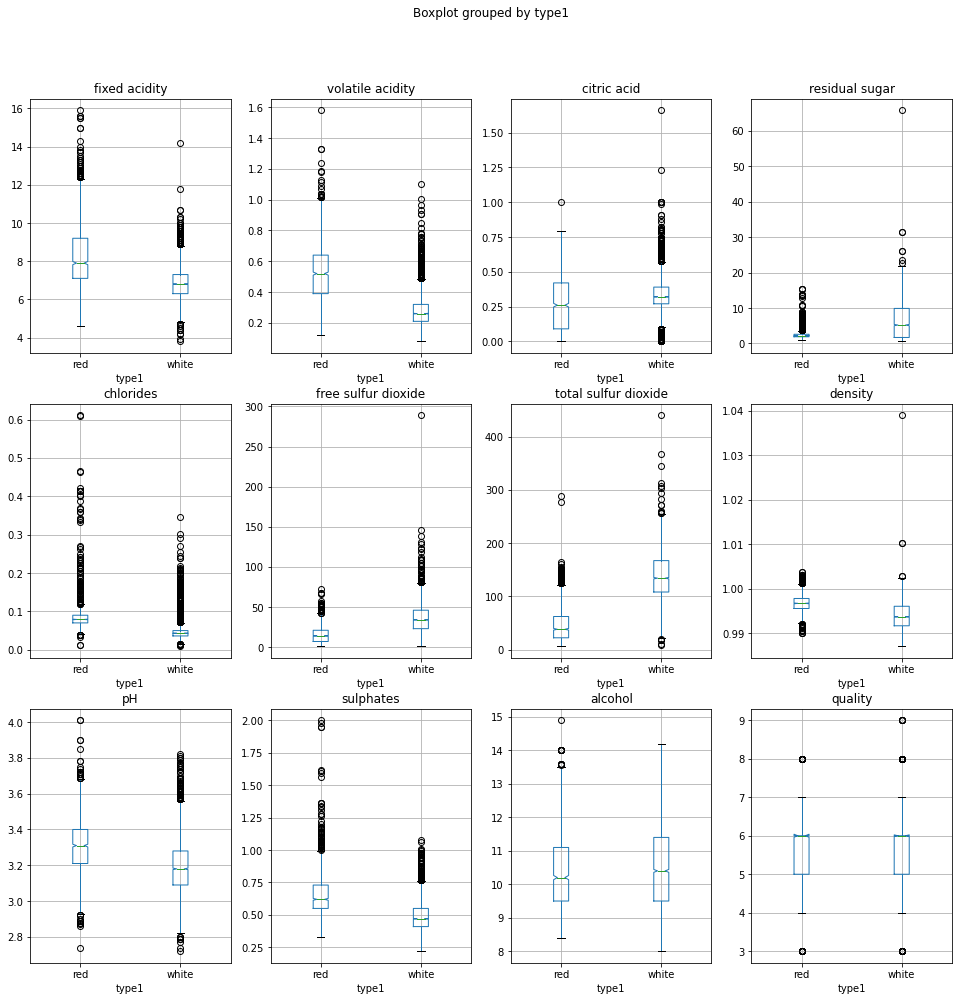

In [9]:
fig,ax = plt.subplots(3,4,  figsize=(16,16))
for i in range(3):
    for j in range(4):
        df.boxplot( column=numerics[i*4+j], by='type1', ax=ax[i][j], notch=True)

<AxesSubplot:xlabel='quality'>

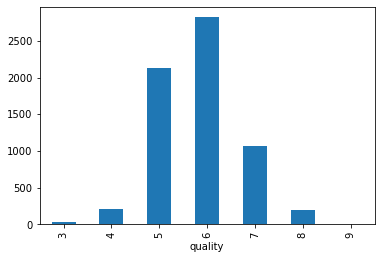

In [10]:
df.groupby('quality').size().plot.bar()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std_sclr = StandardScaler()
X = std_sclr.fit_transform( X=df[numerics[:-1]] )

## 1. mezclas gaussianas 

In [48]:
from sklearn.mixture import GaussianMixture

gm_model = GaussianMixture(n_components=2,
                      covariance_type="diag",
                      max_iter = 1000,
                      random_state=2018)
                      
#Training the algorithm                      
preds = gm_model.fit_predict(X)
np.unique(preds)

array([0, 1])

In [52]:
1-preds

array([1, 1, 1, ..., 0, 0, 0])

In [50]:
df.type1.cat.codes

0       1
1       1
2       1
3       1
4       1
       ..
6458    0
6459    0
6460    0
6461    0
6462    0
Length: 6463, dtype: int8

In [54]:
from sklearn.metrics import classification_report
print(classification_report(df.type1.cat.codes, 1-preds))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1593
           1       1.00      0.94      0.97      4870

    accuracy                           0.96      6463
   macro avg       0.92      0.97      0.94      6463
weighted avg       0.96      0.96      0.96      6463



In [14]:
log_probabilidad_predicha = gm_model.score_samples(X=X)
log_probabilidad_predicha

array([-16.11214173,  -9.74456105,  -9.83537492, ..., -12.65219404,
       -14.40041037, -13.00529331])

/home/bacarbland/anaconda3/envs/DiplDS/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/bacarbland/anaconda3/envs/DiplDS/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


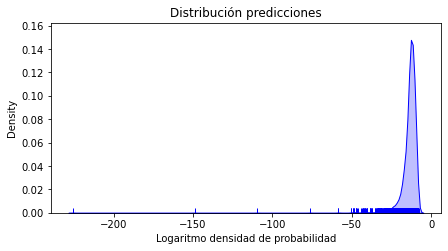

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    log_probabilidad_predicha,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

ax.set_title('Distribución predicciones')
ax.set_xlabel('Logaritmo densidad de probabilidad');

Text(0.5, 1.0, 'Distribución predicciones GMM')

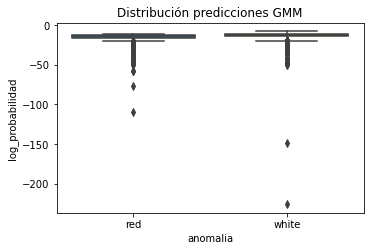

In [16]:
df_resultados = pd.DataFrame({
                    'log_probabilidad' : log_probabilidad_predicha,
                    'anomalia' : df.type1
                })

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 3.5))
sns.boxplot(
    x     = 'anomalia',
    y     = 'log_probabilidad',
    data  = df_resultados,
    #color = "white",
    palette = 'tab10',
    ax    = ax
)

ax.set_title('Distribución predicciones GMM')

## 2. Analisis de PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(.8)

In [19]:
X_pca = pca.fit_transform(X)

In [20]:
X_pca.shape

(6463, 6)

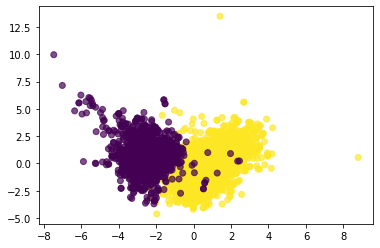

In [40]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=.7, c=df.type1.cat.codes)

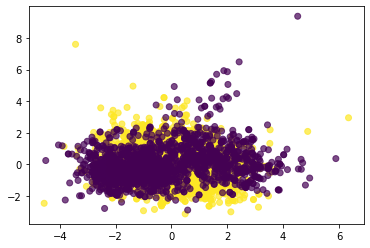

In [22]:
plt.scatter(X_pca[:,2], X_pca[:,3], alpha=.7, c=df.type1.cat.codes)

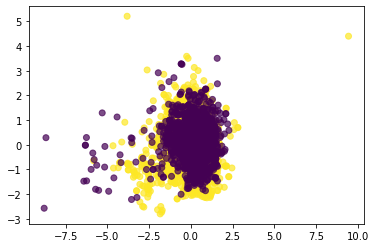

In [23]:
plt.scatter(X_pca[:,4], X_pca[:,5], alpha=.7, c=df.type1.cat.codes)

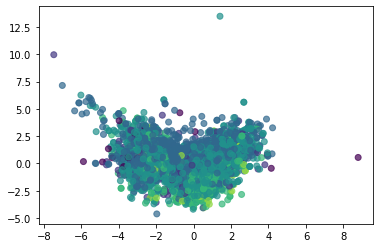

In [24]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=.7, c=df.quality)

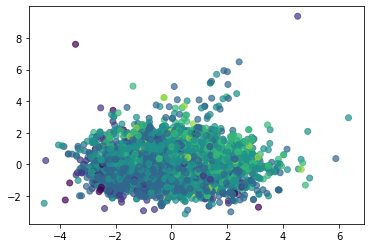

In [25]:
plt.scatter(X_pca[:,2], X_pca[:,3], alpha=.7, c=df.quality)

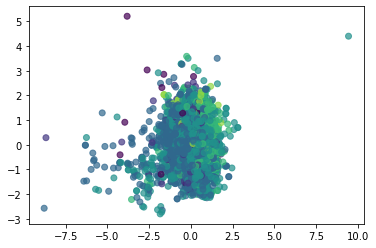

In [26]:
plt.scatter(X_pca[:,4], X_pca[:,5], alpha=.7, c=df.quality)

In [27]:
pca.components_

array([[-0.24251992, -0.38141685,  0.14984836,  0.34408491, -0.29218403,
         0.43078312,  0.48688531, -0.04914261, -0.21640261, -0.29507484,
        -0.10266044],
       [ 0.33390619,  0.11483438,  0.18470169,  0.33253213,  0.31288423,
         0.07573201,  0.09118449,  0.58358526, -0.15680712,  0.18993413,
        -0.46631073],
       [ 0.43284465, -0.30837549,  0.59176583, -0.16367402, -0.01719268,
        -0.13278565, -0.10617949, -0.17508927, -0.45516647,  0.07254599,
         0.26129809],
       [-0.16539161, -0.21254911,  0.26418969, -0.16573633,  0.24321633,
         0.35544912,  0.20776262, -0.07159887,  0.41940349,  0.63956673,
         0.107093  ],
       [ 0.14632251, -0.15336556,  0.15735838,  0.35175021, -0.61328178,
        -0.22717891, -0.16048566,  0.30732701,  0.45612878,  0.12908194,
         0.1842089 ],
       [ 0.20549631,  0.48856143, -0.22882448,  0.23643625, -0.16724333,
         0.3374258 ,  0.15008417, -0.01622808, -0.29307764,  0.30213624,
         0.518

In [28]:
pca.explained_variance_ratio_

array([0.27554555, 0.22681234, 0.14133791, 0.08827446, 0.06547239,
       0.05511265])

## 3. DBScan

In [29]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,2.756749,3.061957
1,-0.126002,-0.492360
2,0.190934,0.378972
3,1.803166,0.602815
4,1.803166,0.602815


In [30]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=0.2, min_samples=20).fit(X_principal)
labels = db_model.labels_

In [31]:
np.unique(labels)

array([-1,  0,  1,  2])

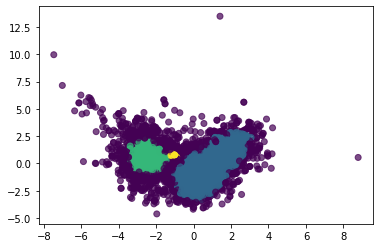

In [32]:
plt.scatter(X_principal['P1'], X_principal['P2'], alpha=.7, c=labels)

## 4. Kernel PCA

In [33]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, gamma=15, kernel='rbf')
X_kpca = kpca.fit_transform(X)

(-1.0, 1.0)

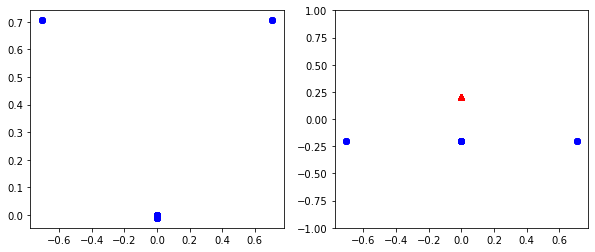

In [34]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(X_kpca[df.type1=="red",0], X_kpca[df.type1=="red",1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[df.type1=="white",0], X_kpca[df.type1=="white",1], color='blue', marker='o', alpha=.5)

ax[1].scatter(X_kpca[df.type1=="red",0], np.zeros((len(X_kpca[df.type1=="red",0]),1))+.2, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[df.type1=="white",0], np.zeros((len(X_kpca[df.type1=="white",0]),1))-.2, color='blue', marker='o', alpha=.5)
ax[1].set_ylim([-1,1])

(-1.0, 1.0)

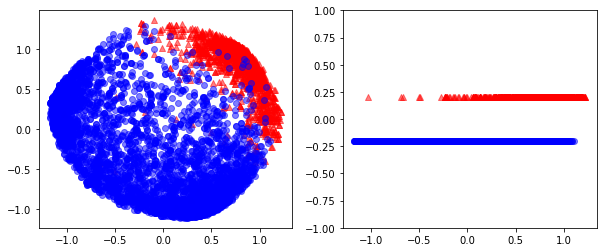

In [45]:
kpca = KernelPCA(n_components=2, gamma=15, kernel='sigmoid')
X_kpca = kpca.fit_transform(X)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(X_kpca[df.type1=="red",0], X_kpca[df.type1=="red",1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[df.type1=="white",0], X_kpca[df.type1=="white",1], color='blue', marker='o', alpha=.5)

ax[1].scatter(X_kpca[df.type1=="red",0], np.zeros((len(X_kpca[df.type1=="red",0]),1))+.2, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[df.type1=="white",0], np.zeros((len(X_kpca[df.type1=="white",0]),1))-.2, color='blue', marker='o', alpha=.5)
ax[1].set_ylim([-1,1])

(-1.0, 1.0)

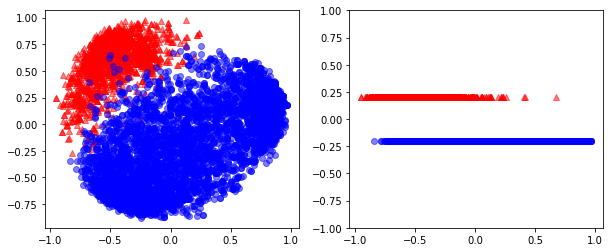

In [47]:
kpca = KernelPCA(n_components=2, gamma=10, kernel='cosine')
X_kpca = kpca.fit_transform(X)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(X_kpca[df.type1=="red",0], X_kpca[df.type1=="red",1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[df.type1=="white",0], X_kpca[df.type1=="white",1], color='blue', marker='o', alpha=.5)

ax[1].scatter(X_kpca[df.type1=="red",0], np.zeros((len(X_kpca[df.type1=="red",0]),1))+.2, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[df.type1=="white",0], np.zeros((len(X_kpca[df.type1=="white",0]),1))-.2, color='blue', marker='o', alpha=.5)
ax[1].set_ylim([-1,1])

## 5. Isomap

In [37]:
from sklearn.manifold import Isomap
i_model = Isomap(n_components = 2)
iso_data = i_model.fit_transform(X)

In [38]:
iso_data

array([[-9.45422508,  6.6504713 ],
       [ 0.66834728, -0.70062857],
       [-1.84912119,  0.75218709],
       ...,
       [ 5.58131896,  0.72885443],
       [ 6.86973594,  0.39479444],
       [ 4.73078954, -0.57617981]])

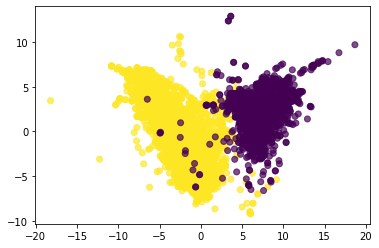

In [39]:
plt.scatter(iso_data[:,0], iso_data[:,1], alpha=.7, c=df.type1.cat.codes)

# Reflexión

Como los datos que tenemos estaban tan aglomerados y variaban tanto en escala estaba siendo dificil dar con los parametros para que DBSCAN nos devolviera algo interesante. Nos regresaba una clasificación donde todos los elementos estaban marcados como ruidosos. Vimos en las visualizaciones de PCA que con dos dimensiones teniamos suficiente para que se diferenciaran grupos, entonces esas fueron las que utilizamos. El desbalanceo de los datos probablemente también es un factor.
Extrañamente recibimos 3 grupos diferentes, 2 de los cuales pertenecen al vino rojo.  
Esto resalta bastante con el PCA con el kernel rbf que separó los vinos blancos en 3 categorias. No encontré una manera de explicar los tres grupos tan bien definidos en los que separa la información rbf. Con el kernel sigmoide y coseno la información se ve mejor diferenciada con referencia al tipo de vino, sin embargo fue un resultado un poco decepcionante ya que no se pueden diferenciar bien los grupos en un solo eje.
Con Manifolds obtuvimos mejores resultados que PCA sencillo, hubiera sido interesante abordar DBSCAN desde este punto de partida.
Quedé bastante sorprendido de lo bien que separo en grupos el algoritmo de mezclas gausianas. Me imagino que es principalmente por su capacidad de cambiar de forma.